In [32]:
def collate_fn(batch):
        # Convert the batch of images and annotations to tensors
        images = []
        annotations = []
        for img, annotation in batch:
            images.append(img)
            annotations.append(annotation)
        images = torch.stack(images, dim=0)
        return images, annotations

In [33]:
from src.data.dataloader import *
import torchvision.datasets as datasets

# Define the transformation pipeline
transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor(),
])

# Instantiate the dataset and dataloader
dataset_train = TacoDataset(dataset_path = r'/work3/s212725/WasteProject/data', split_type = 'train', transform=None)
taco_dataloader_train = DataLoader(dataset_train, batch_size=32, shuffle=True, collate_fn=collate_fn)

dataset_test = TacoDataset(dataset_path = r'/work3/s212725/WasteProject/data', split_type = 'test', transform=transform)
taco_dataloader_test = DataLoader(dataset_test, batch_size=32, shuffle=True, collate_fn=collate_fn)

dataset_val = TacoDataset(dataset_path = r'/work3/s212725/WasteProject/data', split_type = 'val', transform=transform)
taco_dataloader_val = DataLoader(dataset_val, batch_size=32, shuffle=True, collate_fn=collate_fn)

Reading annotations file: /work3/s212725/WasteProject/data/annotations_0_train.json
Reading annotations file: /work3/s212725/WasteProject/data/annotations_0_test.json
Reading annotations file: /work3/s212725/WasteProject/data/annotations_0_val.json


<PIL.Image.Image image mode=RGB size=3024x4032 at 0x7F04BAA54250>
/work3/s212725/WasteProject/data/batch_14/000077.jpg
Bottle
Bottle cap


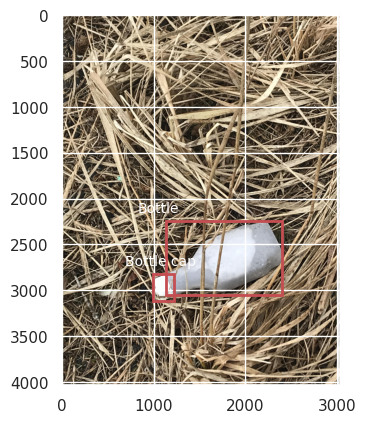

In [35]:
import torch
import matplotlib.pyplot as plt
from PIL import Image, ExifTags
import matplotlib.patches as patches

fig, ax = plt.subplots()

image, anns = dataset_train[3]
print(image)

# Display the image
image = np.asarray(image)
ax.imshow(image)

print(anns['image_path'])
for i in range(len(anns['boxes'])):
    cat = anns['supercats'][i]
    print(cat)
    x = int(anns['boxes'][i][0])
    y = int(anns['boxes'][i][1])
    width = int(anns['boxes'][i][2])
    height = int(anns['boxes'][i][3])

    # Create a Rectangle patch
    rect = patches.Rectangle((x, y), width, height, linewidth=2, edgecolor='r', facecolor='none')

    # Add the patch to the axes
    ax.add_patch(rect)
    ax.text(x-300, y-100, f'{cat}', fontsize=10, color='w')
    
#plt.savefig(r"/work3/s212725/WasteProject/resultsImages/goal_objectDetection4.png")
plt.show()

In [15]:
def resize_image(image):
    # Get original size
    width, height = image.size

    # Determine which dimension to resize based on maximum dimension
    if width >= height and width > 480:
        ratio = 480.0 / width
        new_size = (int(width * ratio), int(height * ratio))
    elif height >= width and height > 480:
        ratio = 480.0 / height
        new_size = (int(width * ratio), int(height * ratio))
    else:
        ratio = 1
        return image, ratio

    # Resize image with new size and preserve aspect ratio
    resized_image = image.resize(new_size, Image.ANTIALIAS)

    return resized_image, ratio

Reading annotations file: /work3/s212725/WasteProject/data/annotations_0_test.json


/tmp/ipykernel_15132/1168402023.py:17: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  resized_image = image.resize(new_size, Image.ANTIALIAS)


batch_11/000062.jpg


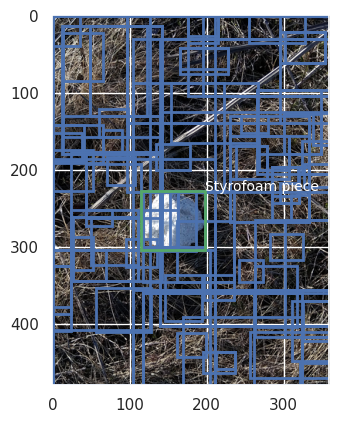

In [32]:
import matplotlib.pyplot as plt
import pickle

dataset_creation = "test"

classes = {'Background':28 , 'Aluminium foil': 0, 'Battery': 1, 'Blister pack': 2, 'Bottle': 3, 'Bottle cap': 4, 
    'Broken glass': 5, 'Can': 6, 'Carton': 7, 'Cup': 8, 'Food waste': 9, 'Glass jar': 10, 
    'Lid': 11, 'Other plastic': 12, 'Paper': 13, 'Paper bag': 14, 'Plastic bag & wrapper': 15,
    'Plastic container': 16, 'Plastic glooves': 17, 'Plastic utensils': 18, 'Pop tab': 19,
    'Rope & strings': 20, 'Scrap metal': 21, 'Shoe': 22, 'Squeezable tube': 23, 'Straw': 24,
    'Styrofoam piece': 25, 'Unlabeled litter': 26, 'Cigarette': 27}

# ------------------- Import the dataset ------------------- #
if dataset_creation == "train":
    # Instantiate the dataset and dataloader
    dataset = TacoDataset(dataset_path = r'/work3/s212725/WasteProject/data', split_type = 'train', transform=None)
elif dataset_creation == "val":
    dataset = TacoDataset(dataset_path = r'/work3/s212725/WasteProject/data', split_type = 'val', transform=None)
elif dataset_creation == "test":
    dataset = TacoDataset(dataset_path = r'/work3/s212725/WasteProject/data', split_type = 'test', transform=None)
else:
    raise ValueError("dataset_creation should be either train, val or test")

# --------------------- Declare Image ---------------------- #
img_value = 7
image, anns = dataset[img_value]
resized_image, ratio = resize_image(image)
image = np.array(resized_image)

# ---- Dictionary storing for testing data ---- #
with open(r"/work3/s212725/WasteProject/results/corrected_testing_rp_dict.pkl", "rb") as f:
    # Load the contents of the pickle file into a variable
    testing_dict = pickle.load(f)

# Show the cropped image
fig, ax = plt.subplots()

gt_boxes = testing_dict["gt_bboxs"][img_value]
super_cats = testing_dict["super_cats"][img_value]
rp_boxes = testing_dict["rp_boxes"][img_value]
file_name = testing_dict["image_file_name"][img_value]
print(file_name)

# Loop through the bounding boxes and add a rectangle to the axis for each one
for i, rp_crop in enumerate(rp_boxes):
    rect = patches.Rectangle((rp_crop[0], rp_crop[1]), rp_crop[2]-rp_crop[0], rp_crop[3]-rp_crop[1], linewidth=2, edgecolor='b', facecolor='none')
    ax.add_patch(rect)
    
    
# Loop through the bounding boxes and add a rectangle to the axis for each one
for i, box in enumerate(gt_boxes):
    x, y, w, h = box
    rect = patches.Rectangle((x*ratio, y*ratio), w*ratio, h*ratio, linewidth=2, edgecolor='g', facecolor='none')
    ax.add_patch(rect)
    # Add text to the right of the bounding box
    ax.text((x+w)*ratio, y*ratio, f'{super_cats[i]}', fontsize=10, color='w')


ax.imshow(image)
plt.savefig(r"/work3/s212725/WasteProject/resultsImages/rps_7_styrofoam.png")
plt.show()

In [54]:
def from_name_to_supercat_id(value_to_find):
    supercategory_id_to_name = {'Background':28, 'Aluminium foil': 0, 'Battery': 1, 'Blister pack': 2, 'Bottle': 3, 'Bottle cap': 4, 
    'Broken glass': 5, 'Can': 6, 'Carton': 7, 'Cup': 8, 'Food waste': 9, 'Glass jar': 10, 
    'Lid': 11, 'Other plastic': 12, 'Paper': 13, 'Paper bag': 14, 'Plastic bag & wrapper': 15,
    'Plastic container': 16, 'Plastic glooves': 17, 'Plastic utensils': 18, 'Pop tab': 19,
    'Rope & strings': 20, 'Scrap metal': 21, 'Shoe': 22, 'Squeezable tube': 23, 'Straw': 24,
    'Styrofoam piece': 25, 'Unlabeled litter': 26, 'Cigarette': 27}
        
    for key, value in supercategory_id_to_name.items():
        if value == value_to_find:
            return key

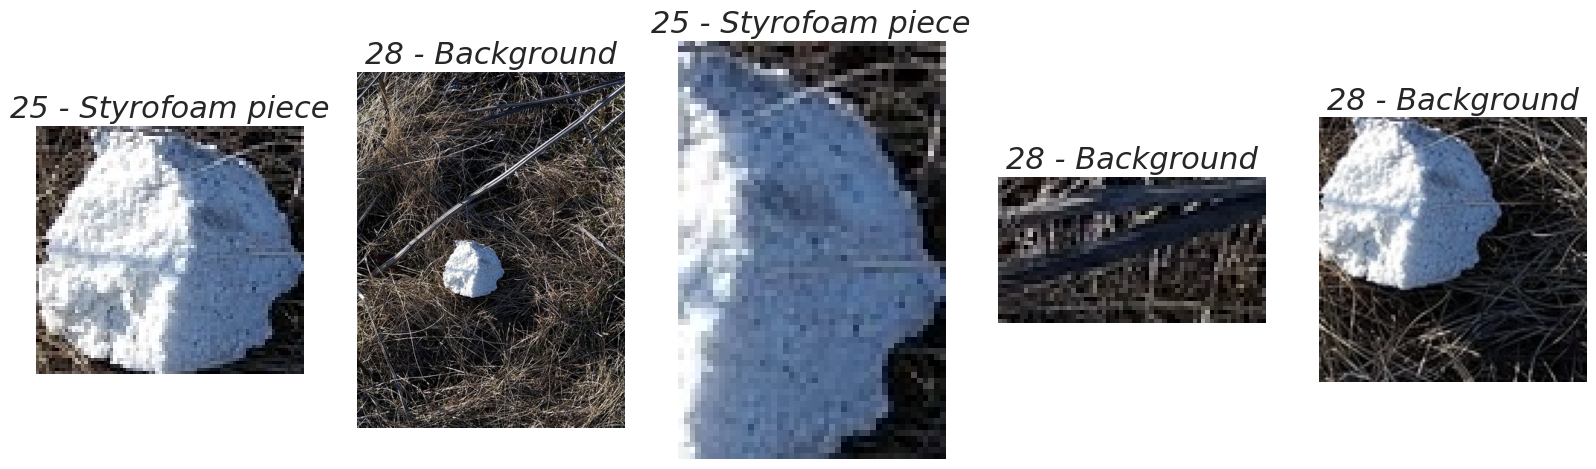

In [70]:
import json
import re
from PIL import Image
import matplotlib.pyplot as plt

# Open the JSON file
with open(r'/work3/s212725/WasteProject/data/json/corrected_test_region_proposals_3.json', 'r') as f:
    # Load the contents of the file into a variable
    data = json.load(f)

pattern = r'^/work3/s212725/WasteProject/data/test_proposals/crops/batch_11/000062_[^/]*\.jpg$'
count = 0
fig, axs = plt.subplots(1, 5, figsize=(20, 6))
#fig.subplots_adjust(hspace=0.5)  # Add extra vertical spacing between subplots
for path, label in data.items():
    match = re.match(pattern, path)
    if match:
        # Load the image using PIL
        img = Image.open(path)

        # Plot the image
        axs[count].imshow(img)
        axs[count].axis('off')
        # Set title for the subplot
        axs[count].set_title(f"{label} - {from_name_to_supercat_id(label)}", loc="center", fontstyle='italic', fontsize=22)

        count += 1
        if count == 5:
            break
plt.savefig(r"/work3/s212725/WasteProject/resultsImages/crops_7_styrofoam.png")
plt.show()


# Data augmentation of GT Proposals

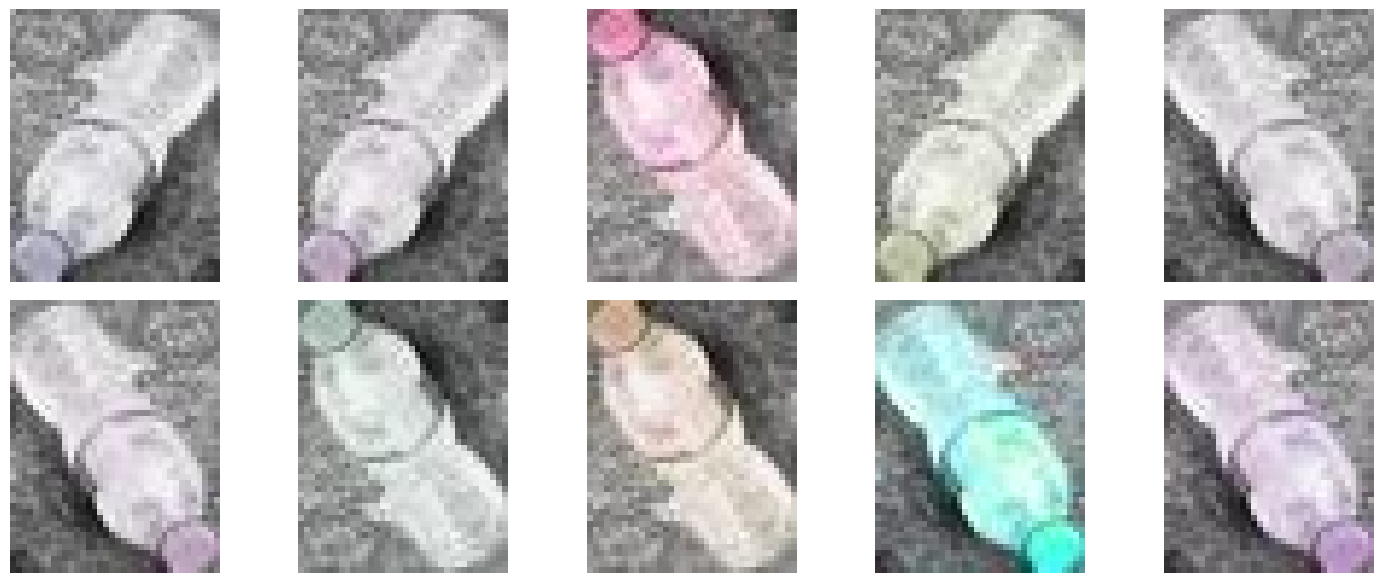

In [31]:
import os
import matplotlib.pyplot as plt
from PIL import Image
import re

directory = r"/work3/s212725/WasteProject/data/augmented_proposals/batch_1"
pattern = r"000000_gt0_augmented_\d+\.jpg"

# Get the list of image file names in the directory
image_files = [file for file in os.listdir(directory) if re.match(pattern, file)]

# Calculate the number of rows and columns for the plot
num_rows = len(image_files) // 5  # Number of complete rows
num_cols = 5  # Number of columns

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 6))

# Loop through each image file and plot it
for i, image_file in enumerate(image_files):
    row = i // num_cols
    col = i % num_cols

    image_path = os.path.join(directory, image_file)
    image = Image.open(image_path)

    # Plot the image
    axes[row, col].imshow(image)
    axes[row, col].axis('off')  # Remove axis labels

# Remove any empty subplots
if len(image_files) < num_rows * num_cols:
    for i in range(len(image_files), num_rows * num_cols):
        fig.delaxes(axes.flatten()[i])

plt.tight_layout()  # Adjust the spacing between subplots
plt.savefig(r"/work3/s212725/WasteProject/resultsImages/gt_augmented_proposals.png")
plt.show()
